<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/TensorFlow%20In%20Practice/Course%203%20-%20NLP/Course%203%20-%20Week%202%20-%20Lesson%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import csv
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [7]:
path = '/tmp/spam.csv'

messages = []
labels = []

with open(path, encoding='ISO-8859-1') as csv_file:
  reader = csv.reader(csv_file)
  for row in reader:
    messages.append(row[1])
    labels.append(0 if row[0] == 'ham' else 1)

In [10]:
sample = 3
print(labels[sample])
print(messages[sample])

1
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


In [12]:
training_percentage = 0.2
training_size = int(len(labels) * training_percentage)

print(len(labels))
print(training_size)

5573
1114


In [37]:
training_messages = messages[0:training_size]
training_labels = labels[0:training_size]
test_messages = messages[training_size:]
test_labels = labels[training_size:]

In [44]:
tokenizer = Tokenizer(num_words=200, oov_token='<oov>')
tokenizer.fit_on_texts(training_messages)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_messages)
training_padded = pad_sequences(training_sequences, maxlen=150, padding='post', truncating='post')

testing_sequences = tokenizer.texts_to_sequences(test_messages)
testing_padded = pad_sequences(testing_sequences, maxlen=150, padding='post', truncating='post')

In [45]:
# Need this block to get it to work with TensorFlow 2.x
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(test_labels)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(200, 100, input_length=150),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 150, 100)          20000     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 24)                2424      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 22,449
Trainable params: 22,449
Non-trainable params: 0
_________________________________________________________________


In [48]:
print(len(training_labels))
print(len(testing_labels))

1114
4459


In [51]:
num_epochs = 50
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/50
35/35 - 1s - loss: 0.0688 - accuracy: 0.9820 - val_loss: 0.0909 - val_accuracy: 0.9684
Epoch 2/50
35/35 - 1s - loss: 0.0667 - accuracy: 0.9829 - val_loss: 0.0920 - val_accuracy: 0.9697
Epoch 3/50
35/35 - 1s - loss: 0.0663 - accuracy: 0.9829 - val_loss: 0.0937 - val_accuracy: 0.9693
Epoch 4/50
35/35 - 1s - loss: 0.0645 - accuracy: 0.9829 - val_loss: 0.0887 - val_accuracy: 0.9691
Epoch 5/50
35/35 - 1s - loss: 0.0610 - accuracy: 0.9847 - val_loss: 0.0889 - val_accuracy: 0.9688
Epoch 6/50
35/35 - 1s - loss: 0.0611 - accuracy: 0.9856 - val_loss: 0.0904 - val_accuracy: 0.9691
Epoch 7/50
35/35 - 1s - loss: 0.0609 - accuracy: 0.9856 - val_loss: 0.0880 - val_accuracy: 0.9691
Epoch 8/50
35/35 - 1s - loss: 0.0572 - accuracy: 0.9865 - val_loss: 0.0882 - val_accuracy: 0.9708
Epoch 9/50
35/35 - 1s - loss: 0.0575 - accuracy: 0.9856 - val_loss: 0.0878 - val_accuracy: 0.9691
Epoch 10/50
35/35 - 1s - loss: 0.0553 - accuracy: 0.9856 - val_loss: 0.0910 - val_accuracy: 0.9697
Epoch 11/50
35/35 -

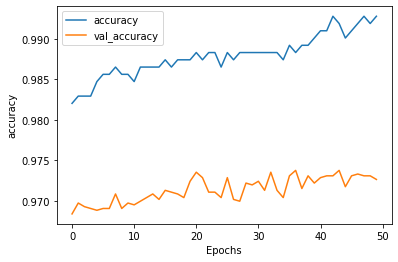

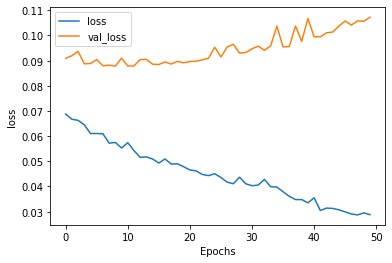

In [52]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [63]:
sentence = ["Hello, how r u?", 
            "IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out.",
            "Due to a new legislation, those struggling with debt can now apply to have it written off. For more information text the word INFO or to opt out text STOP",
            "Our records indicate your Pension is under performing to see higher growth and up to 25% cash release reply PENSION for a free review",
            "DUDE! You've got to see this!",
            "Hey, it's been a while. I'd love to see you at the party. :)"]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=150, padding='post', truncating='post')
print(model.predict(padded))

[[1.3817021e-03]
 [9.9532521e-01]
 [9.9802655e-01]
 [9.8990881e-01]
 [8.4063096e-04]
 [3.9597531e-03]]
